In classification problems, neural networks output logits that are computed for each class. A softmax layer "normalizes" these logits $ z_i $ into probabilities $ q_i $. 
For a softer distribution, logits are 'softened' or divided by a constant value, called the temperature $ T$.

$$ q_{i}=\frac{\exp \left(z_{i} / T\right)}{\sum_{j} \exp \left(z_{j} / T\right)} $$

When the temperature is 1, the probabilities obtained are said to be unsoftened. Hinton et.al. that, in general, the temperature depends on the number of units in the hidden layer of a network. For example, when the number of units in the hidden layer was 300, temperatures above 8 worked well, whereas when the number of units was 30, temperatures in the range of 2.5-4 worked best. Higher the temperature, softer the probabilities.

Consider a classification problem with four classes, [cow, dog, cat, car]. If we have an image of a dog, unsoftened hard targets would be [0, 1, 0, 0]. This doesn't tell much about what the ensemble has learned. By softening, we may get [0.05, 0.3, 0.2, 0.005]. It's clear that predicting a cow is 10 times greater than a car. It's this 'dark' knowledge that needs to be distilled from the teacher network to the student.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

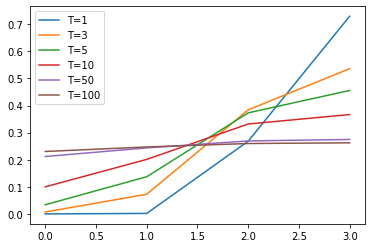

In [5]:
logits = np.array([-5, 2, 7, 8])

# T=1
sortmax_1 = np.exp(logits) / sum(np.exp(logits))
# T=3
sortmax_3 = np.exp(logits / 3) / sum(np.exp(logits / 3))
# T=5
sortmax_5 = np.exp(logits / 5) / sum(np.exp(logits / 5))
# T=10
sortmax_10 = np.exp(logits / 10) / sum(np.exp(logits / 10))
# T=50
sortmax_50 = np.exp(logits / 50) / sum(np.exp(logits / 50))
# T=100
sortmax_100 = np.exp(logits / 100) / sum(np.exp(logits / 100))

# T越大,分布越平缓
plt.plot(sortmax_1, label='T=1')
plt.plot(sortmax_3, label='T=3')
plt.plot(sortmax_5, label='T=5')
plt.plot(sortmax_10, label='T=10')
plt.plot(sortmax_50, label='T=50')
plt.plot(sortmax_100, label='T=100')
plt.legend()

### The generic teacher-student framework for knowledge distillation.

<img src="../../../Other/img/distillation0.png">

### The schematic illustrations of sources of response-based knowledge, feature-based knowledge and relation-based knowledge in a deep teacher network.

<img src="../../../Other/img/distillation1.png">

### The generic response-based knowledge distillation.

<img src="../../../Other/img/distillation2.png">

<img src="../../../Other/img/distillation2_1.jpg">

### The specific architecture of the benchmark knowledge distillation

<img src="../../../Other/img/distillation3.png">

### The generic feature-based knowledge distillation.

<img src="../../../Other/img/distillation4.jpg">

#### The generic instance relation-based knowledge distillation.

<img src="../../../Other/img/distillation5.jpg">